   Glucose  BloodPressure  Insulin  BMI   Age
0        6             87        0    0   8.4
1        0            102        0    0   7.8
2        2            125       20  140   8.8
3        2             90       17    0   8.5
4        0            117       31   53   8.9
5        2            114       22    0   9.2
6        6             92       32  126   8.5
7        1            173        0    0   8.8
8        2             74        0    0  10.2
9        9             57       37    0   9.6
       Glucose  BloodPressure  Insulin    BMI    Age
count   709.00         709.00   709.00 709.00 709.00
mean      3.85         119.92    20.04  76.89  40.26
std       3.36          31.55    15.88 112.39  21.55
min       0.00           0.00     0.00   0.00   7.80
25%       1.00          99.00     0.00   0.00  23.60
50%       3.00         116.00    22.00  18.00  34.20
75%       6.00         139.00    32.00 122.00  55.70
max      17.00         198.00    99.00 846.00  96.20
   Glucose  Blood

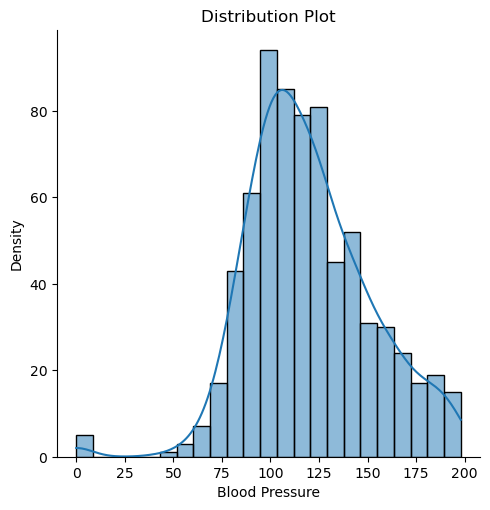

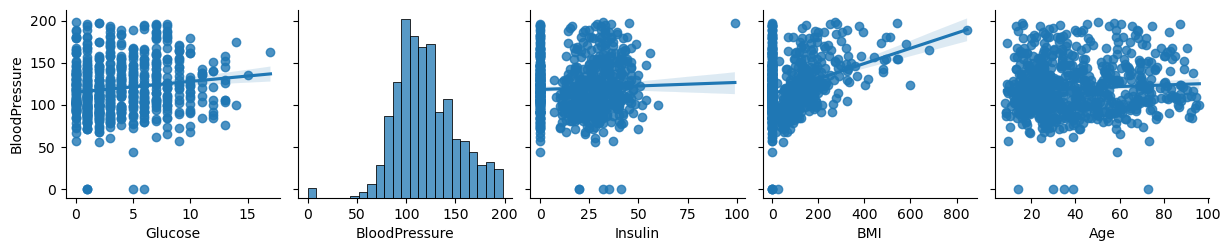

Mean squared error: 1.4392378340663238e-27


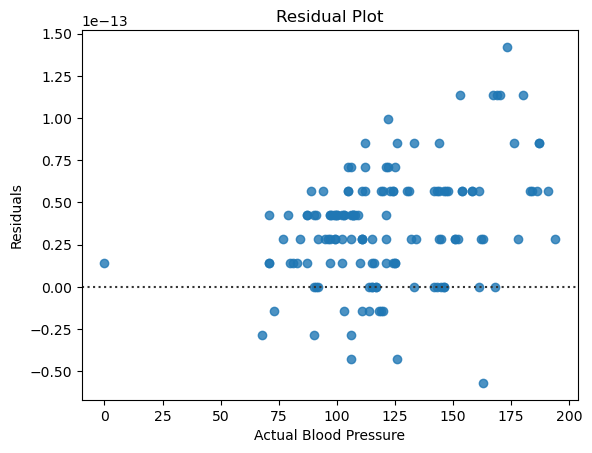

Score: 100%


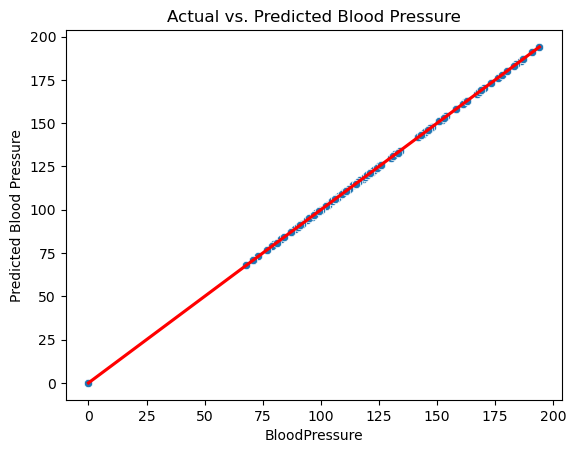

In [30]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('diabetes_data.csv')

# View first ten records
print(df.head(10))

with pd.option_context('float_format', '{:.2f}'.format): 
    print(df.describe())
    
# Summarize most common values for features with non-continuous or categorical values
features_to_summarize = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']
print(df[features_to_summarize].mode())

# Distribution plot
sns.displot(df['BloodPressure'], kde=True)
plt.xlabel("Blood Pressure")
plt.ylabel("Density")
plt.title("Distribution Plot")
plt.show()

# Pair plot
sns.pairplot(df, x_vars=['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age'], y_vars='BloodPressure', kind='reg')
plt.show()

# Splitting the data into training and testing sets
X = df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']]
y = df['BloodPressure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test data and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Residual plot
sns.residplot(x=y_test, y=y_pred)
plt.xlabel("Actual Blood Pressure")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Evaluate the model's performance using test data and labels
score = model.score(X_test, y_test)
print('Score: {}%'.format(int(round(score * 100))))

# Scatter plot
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Blood Pressure")
plt.ylabel("Predicted Blood Pressure")
plt.title("Actual vs. Predicted Blood Pressure")
sns.regplot(x=y_test, y=y_pred, scatter=False, color="red")
plt.show()
